In [1]:
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
image_dir = Path(r"C:/Users/malha/Desktop/MasterWayne/healthcare project/CNN_healthcare_model/archive/cell_images/train_data/")

## Creating file dataframe

In [3]:
filepath = list(image_dir.glob(r'**/*.png'))

In [4]:
filepath[0]

WindowsPath('C:/Users/malha/Desktop/MasterWayne/healthcare project/CNN_healthcare_model/archive/cell_images/train_data/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')

In [5]:
#os.path.split(os.path.split(os.path.split(filepath[0])[0])[1])[1]

labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], filepath))
labels

['Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasi

In [6]:
len(labels)

27558

In [7]:
labels[-10:]

['Uninfected',
 'Uninfected',
 'Uninfected',
 'Uninfected',
 'Uninfected',
 'Uninfected',
 'Uninfected',
 'Uninfected',
 'Uninfected',
 'Uninfected']

In [8]:
filepath = pd.Series(filepath, name= "filepath").astype(str)
labels = pd.Series(labels,name='labels')

images = pd.concat([filepath,labels],axis=1)

In [9]:
images

,filepath,labels
0,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
1,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
2,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
3,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
4,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
...,...,...
27553,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
27554,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
27555,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
27556,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected


In [10]:
from sklearn.utils import shuffle
df = shuffle(images)
df[:20]

,filepath,labels
15279,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
6804,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
17213,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
13377,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
8942,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
293,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
12835,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
10275,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
19998,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
12100,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized


In [11]:
df['labels'].value_counts()

Parasitized    13779
Uninfected     13779
Name: labels, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27558 entries, 15279 to 14575
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  27558 non-null  object
 1   labels    27558 non-null  object
dtypes: object(2)
memory usage: 645.9+ KB


In [13]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df,test_size=0.2,random_state=42)

In [14]:
train_df.shape,test_df.shape

((22046, 2), (5512, 2))

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22046 entries, 11704 to 24298
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  22046 non-null  object
 1   labels    22046 non-null  object
dtypes: object(2)
memory usage: 516.7+ KB


In [16]:
test_df[:10]

,filepath,labels
15935,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
5969,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
2625,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
23480,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
7131,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
24908,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
11343,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized
26584,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
24170,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Uninfected
11123,C:\Users\malha\Desktop\MasterWayne\healthcare ...,Parasitized


In [17]:
from tensorflow.keras.applications.vgg19 import VGG19

In [18]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,validation_split=0.25)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [63]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='labels',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='labels',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='labels',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 16535 validated image filenames belonging to 2 classes.
Found 5511 validated image filenames belonging to 2 classes.
Found 5512 validated image filenames belonging to 2 classes.


In [64]:
pretrained_model = tf.keras.applications.VGG19(
    input_shape=(224,224,3),
    include_top = False,
    weights='imagenet')

In [65]:
pretrained_model.trainable = False

In [66]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = pretrained_model(inputs)
print(f"Shape after base_model: {x.shape}")
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

outputs = tf.keras.layers.Dense(2, activation="softmax", name="output_layer")(x)

model = tf.keras.Model(inputs, outputs)

Shape after base_model: (None, 7, 7, 512)
After GlobalAveragePooling2D(): (None, 128)


In [67]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 dense_2 (Dense)             (None, 7, 7, 128)         65664     
                                                                 
 global_average_pooling_laye  (None, 128)              0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 2)                 258       
                                                                 
Total params: 20,090,306
Trainable params: 65,922
Non-trainable params: 20,024,384
__________________________________________

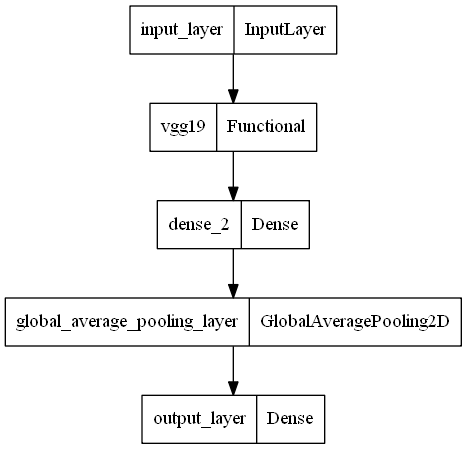

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [69]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [70]:
history_model = model.fit(train_images,
                          epochs=5,
                          steps_per_epoch=len(train_images),
                          validation_data=val_images,
                          validation_steps=len(val_images))

Epoch 1/5
517/517 [==============================] - 125s 241ms/step - loss: 0.5253 - accuracy: 0.7455 - val_loss: 0.3932 - val_accuracy: 0.8548
Epoch 2/5
517/517 [==============================] - 125s 242ms/step - loss: 0.3465 - accuracy: 0.8608 - val_loss: 0.2949 - val_accuracy: 0.8962
Epoch 3/5
517/517 [==============================] - 125s 242ms/step - loss: 0.2791 - accuracy: 0.8936 - val_loss: 0.2819 - val_accuracy: 0.9046
Epoch 4/5
517/517 [==============================] - 125s 242ms/step - loss: 0.2449 - accuracy: 0.9084 - val_loss: 0.2324 - val_accuracy: 0.9102
Epoch 5/5
517/517 [==============================] - 126s 243ms/step - loss: 0.2338 - accuracy: 0.9118 - val_loss: 0.2256 - val_accuracy: 0.9183


In [71]:
model.evaluate(test_images)

173/173 [==============================] - 31s 181ms/step - loss: 0.2233 - accuracy: 0.9213


[0.22334590554237366, 0.9212626814842224]

In [76]:
# Plot the validation and training data separately
def plot_loss_curves(history):
 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

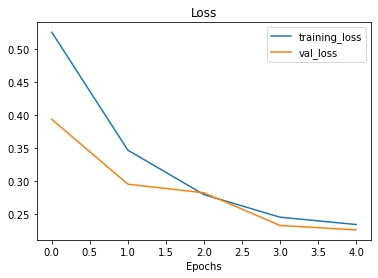

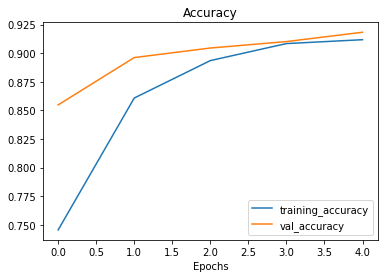

In [77]:
plot_loss_curves(history_model)

In [74]:
prediction = np.argmax(model.predict(test_images), axis=1)

In [75]:
prediction[:20]

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_images.labels, prediction)
clr = classification_report(test_images.labels, prediction)

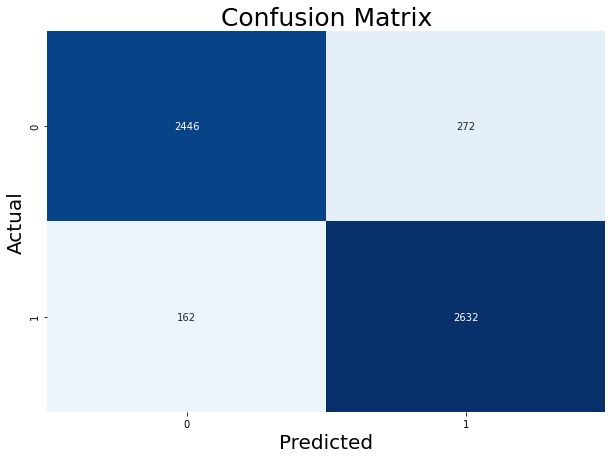

In [79]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual",fontsize=20)
plt.title("Confusion Matrix",fontsize=25)
plt.show();

In [80]:
print(clr)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2718
           1       0.91      0.94      0.92      2794

    accuracy                           0.92      5512
   macro avg       0.92      0.92      0.92      5512
weighted avg       0.92      0.92      0.92      5512

